## Importing Libraries

In [5]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
root = 'C:\\Users\\amit0\\OneDrive\\Desktop\\Exploratory project0\\'

## Reading Image Data From Directory

In [10]:
image_paths = []
image_classes = []
for folder in os.listdir(root+'image_data\\'):
    for files in os.listdir(root+'image_data\\'+folder):
        if(files.endswith('.jpg')):
            image_paths.append('image_data\\'+folder+'\\'+files)
            image_classes.append(folder)
len(image_paths), len(image_classes), image_paths[:5], image_classes[:5]

(5477,
 5477,
 ['image_data\\biotite\\C1_01_01.jpg',
  'image_data\\biotite\\C1_01__02.jpg',
  'image_data\\biotite\\C1_01__03.jpg',
  'image_data\\biotite\\C1_01__05.jpg',
  'image_data\\biotite\\C1_01__06.jpg'],
 ['biotite', 'biotite', 'biotite', 'biotite', 'biotite'])

In [12]:
image_class_mapping = pd.DataFrame({'image_paths':image_paths, 'image_classes': image_classes})
image_class_mapping.sample(5)

,image_paths,image_classes
1956,image_data\chrysocolla\C3_03_536.jpg,chrysocolla
443,image_data\biotite\C1_01__446.jpg,biotite
5120,image_data\quartz\C7_07__666.jpg,quartz
3755,image_data\pyrite\C6_06__473.jpg,pyrite
2376,image_data\malachite\C4_04__472.jpg,malachite


## Saving Image Paths vs Class Names

In [15]:
image_class_mapping.to_csv(root+'image_class_mapping.csv', index=False)

In [17]:
mapping = pd.read_csv(root+'image_class_mapping.csv')
mapping.head()

,image_paths,image_classes
0,image_data\biotite\C1_01_01.jpg,biotite
1,image_data\biotite\C1_01__02.jpg,biotite
2,image_data\biotite\C1_01__03.jpg,biotite
3,image_data\biotite\C1_01__05.jpg,biotite
4,image_data\biotite\C1_01__06.jpg,biotite


## Loading and Displaying Images

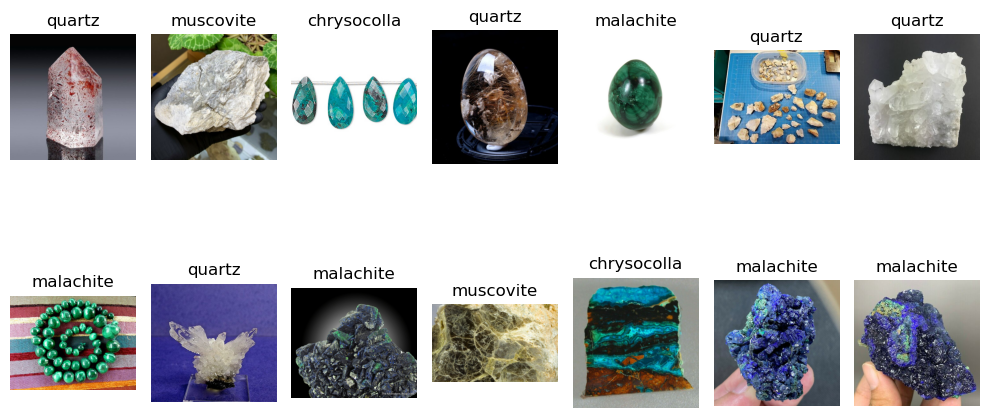

In [20]:
rows = 2
cols = 7
fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
show_images_sample = mapping.sample(14)
for i, ax in enumerate(axes.flat):
    if i < len(show_images_sample):
        img = cv2.imread(show_images_sample.iloc[i]['image_paths'])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        ax.imshow(img)
        ax.axis('off')  # Turn off the axis
        ax.set_title(show_images_sample.iloc[i]['image_classes'])  # Set the title as the image class
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

## Creating List of Images and Classes

In [22]:
images = []
classes = []
for i in tqdm(range(len(mapping))):
    img = cv2.imread(mapping.iloc[i]['image_paths'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    images.append(img)
    classes.append(mapping.iloc[i]['image_classes'])
images[0].shape

100%|██████████████████████████████████████████████████████████████████████████████| 5477/5477 [01:55<00:00, 47.60it/s]


(292, 425, 3)

In [23]:
len(images),len(classes)

(5477, 5477)

## Checking Class Distribution

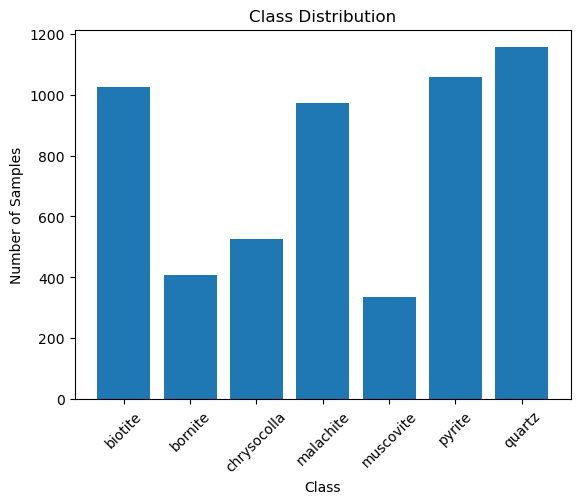

In [28]:
unique_classes, counts = np.unique(classes, return_counts=True)
plt.bar(unique_classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(unique_classes,rotation=45)  # Set the ticks to the class labels
plt.show()

In [30]:
counts

array([1025,  407,  525,  973,  335, 1057, 1155], dtype=int64)

In [32]:
less_count_class = []
for i in range(7):
    if(counts[i]<550):
        less_count_class.append(unique_classes[i])
less_count_class

['bornite', 'chrysocolla', 'muscovite']

## Rotating Images for Data Augmentation

In [35]:
rotate_images=[]
rotate_classes=[]
for i in tqdm(range(len(classes))):
    if(classes[i] in less_count_class):
        rotated_image = cv2.rotate(images[i], cv2.ROTATE_90_COUNTERCLOCKWISE)
        rotate_images.append(rotated_image)
        rotate_classes.append(classes[i])
len(rotate_images), len(rotate_classes)

100%|█████████████████████████████████████████████████████████████████████████████| 5477/5477 [00:14<00:00, 375.17it/s]


(1267, 1267)

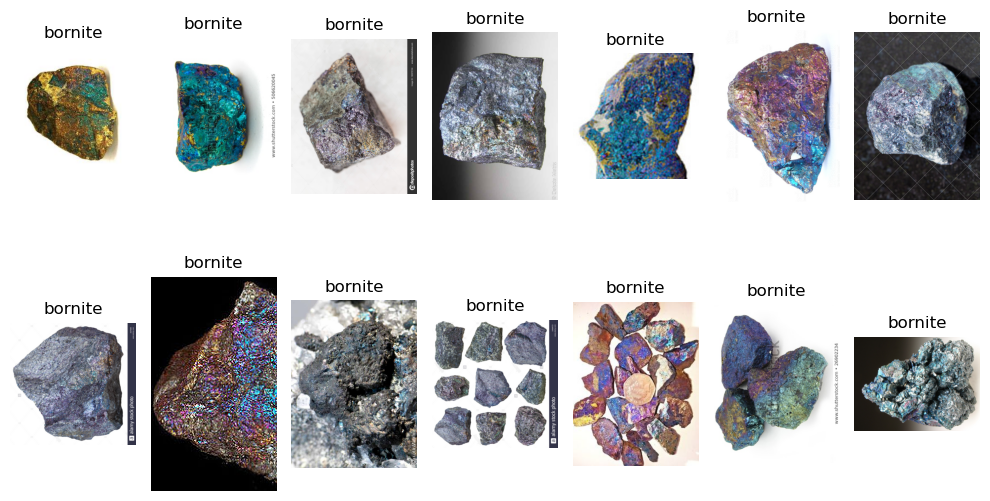

In [36]:

rows = 2
cols = 7
fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
rotate_img_sample = rotate_images[:rows*cols]
for i, ax in enumerate(axes.flat):
    if i < len(rotate_img_sample):
        ax.imshow(rotate_img_sample[i])
        ax.axis('off')  # Turn off the axis
        ax.set_title(rotate_classes[i])  # Set the title as the image class
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [37]:
images=images+rotate_images
classes=classes+rotate_classes
len(images),len(classes)

(6744, 6744)

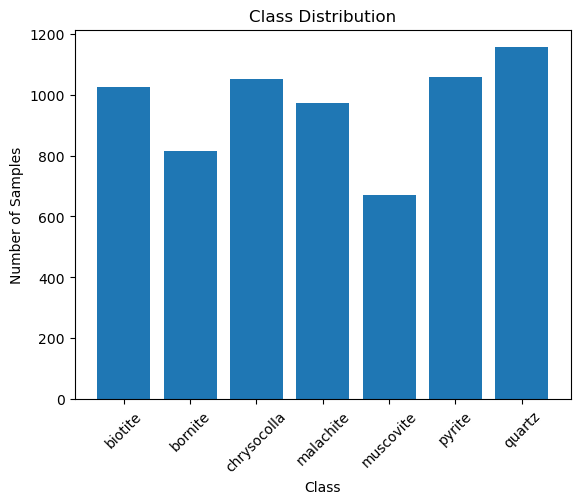

In [38]:
unique_classes, counts = np.unique(classes, return_counts=True)
plt.bar(unique_classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(unique_classes,rotation=45)  # Set the ticks to the class labels
plt.show()

## Adding Noises for Data Augmentation

In [44]:
noise_images=[]
noise_classes=[]
mean = 0
std = 30                                                                                                               
for i in tqdm(range(100)):
    gaussian_noise = np.random.normal(mean, std, images[i].shape).astype(np.float32)
    noise_image = images[i] + gaussian_noise
    noise_image = np.clip(noise_image, 0, 255).astype(np.uint8)
    noise_images.append(noise_image)
    noise_classes.append(classes[i])
len(noise_images), len(noise_classes)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.38it/s]


(100, 100)

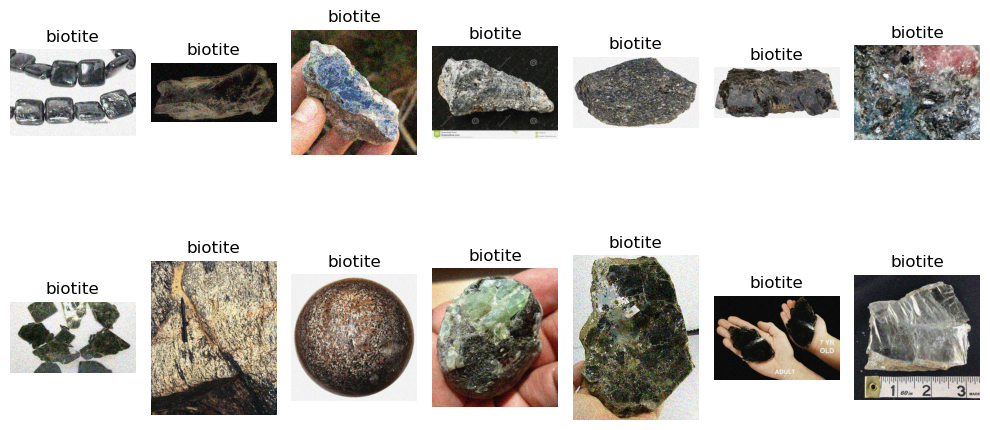

In [45]:
rows = 2
cols = 7
fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
noise_img_sample = noise_images[:rows*cols]
for i, ax in enumerate(axes.flat):
    if i < len(noise_img_sample):
        ax.imshow(noise_img_sample[i])
        ax.axis('off')  # Turn off the axis
        ax.set_title(noise_classes[i])  # Set the title as the image class
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [46]:
images=images+noise_images
classes=classes+noise_classes
len(images),len(classes)

(6844, 6844)

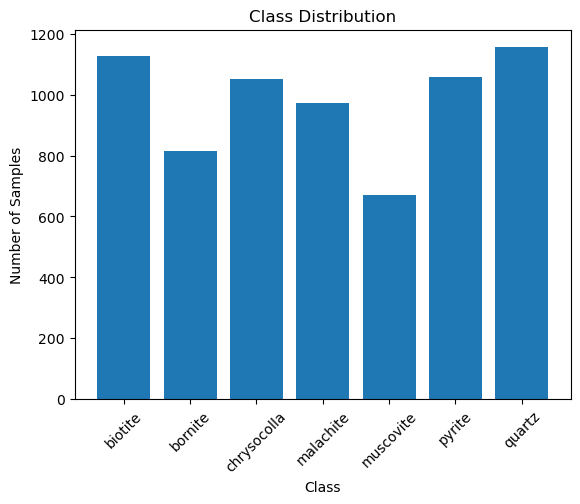

In [47]:
unique_classes, counts = np.unique(classes, return_counts=True)
plt.bar(unique_classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(unique_classes,rotation=45)  # Set the ticks to the class labels
plt.show()

## Resizing Images to Fix Size

In [49]:
target_length = 224
target_width = 224
resized_images = []
for i in tqdm(range(len(images))):
    img_resized = cv2.resize(images[i], (target_length, target_width))
    resized_images.append(img_resized)
resized_images[0].shape

100%|█████████████████████████████████████████████████████████████████████████████| 6844/6844 [00:31<00:00, 217.11it/s]


(224, 224, 3)

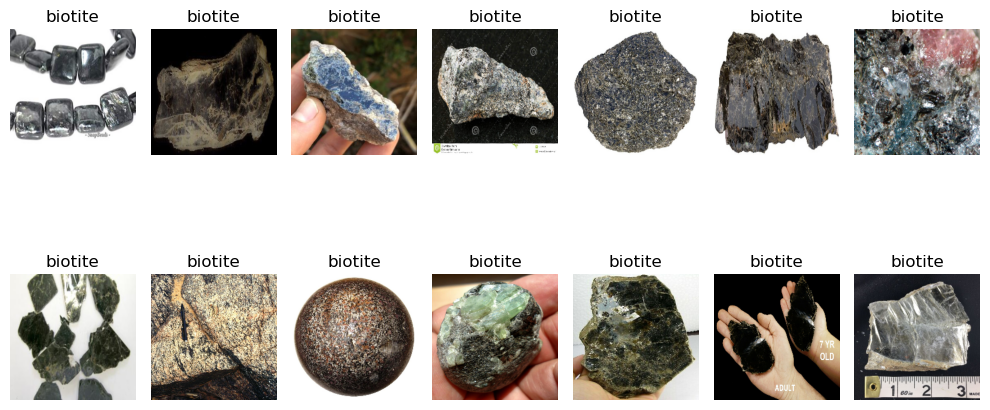

In [55]:
rows = 2
cols = 7
fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
resized_img_sample = resized_images[:rows*cols]
for i, ax in enumerate(axes.flat):
    if i < len(resized_img_sample):
        ax.imshow(resized_img_sample[i])
        ax.axis('off')  # Turn off the axis
        ax.set_title(classes[i])  # Set the title as the image class
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

## Scaling Images Pixels in 0-1 Range

In [57]:
scale_images = []
for i in tqdm(range(len(resized_images))):
    scale_img = resized_images[i]/255.0
    scale_images.append(scale_img)
scale_images[0].shape

100%|█████████████████████████████████████████████████████████████████████████████| 6844/6844 [00:15<00:00, 440.65it/s]


(224, 224, 3)

In [58]:
X = np.array(scale_images)
X.shape

(6844, 224, 224, 3)

## Spliting Data for Training and Validation

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, class_train, class_test = train_test_split(X, classes, test_size=0.3, random_state=42, stratify=classes)

In [61]:
X_train.shape, X_test.shape, len(class_train), len(class_test)

((4790, 224, 224, 3), (2054, 224, 224, 3), 4790, 2054)

In [67]:
class_train[:5]

['biotite', 'muscovite', 'quartz', 'pyrite', 'malachite']

## Applying One Hot Encoding for Classes

In [70]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [71]:
label_encoder = LabelEncoder()
label_encoder.fit(classes)
class_train_int = label_encoder.transform(class_train)
class_test_int = label_encoder.transform(class_test)

In [72]:
class_train_int[:5], class_test_int[:5]

(array([0, 4, 6, 5, 3]), array([2, 6, 6, 4, 6]))

In [73]:
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
le_name_mapping

{'biotite': 0,
 'bornite': 1,
 'chrysocolla': 2,
 'malachite': 3,
 'muscovite': 4,
 'pyrite': 5,
 'quartz': 6}

In [78]:
import pickle
with open(root+'label_encoder_21.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [80]:
class_train_one_hot = to_categorical(class_train_int, num_classes=len(label_encoder.classes_))
class_test_one_hot = to_categorical(class_test_int, num_classes=len(label_encoder.classes_))

In [82]:
class_train_one_hot.shape, class_test_one_hot.shape

((4790, 7), (2054, 7))

In [84]:
X_train.shape, X_test.shape

((4790, 224, 224, 3), (2054, 224, 224, 3))

## Creating CNN Neural Netowrks Achitecture

In [87]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.regularizers import l2

In [91]:
# Define the model
model = Sequential([
    # First convolutional layer
    Input(shape=(target_length, target_length, 3)),
    
    Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output from the convolutional layers
    Flatten(),

    # Fully connected layer
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # To prevent overfitting

    # Output layer for 7 classes
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [93]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,246,471 (84.86 MB)

 Trainable params: 22,246,471 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
X_train.shape, class_train_one_hot.shape

((4790, 224, 224, 3), (4790, 7))

In [97]:
X_test.shape, class_test_one_hot.shape

((2054, 224, 224, 3), (2054, 7))

## Starting Model Training

In [100]:
history = model.fit(X_train, class_train_one_hot, epochs=19, batch_size=16, validation_data=(X_test, class_test_one_hot))

Epoch 1/19
300/300 ━━━━━━━━━━━━━━━━━━━━ 132s 418ms/step - accuracy: 0.2754 - loss: 2.2747 - val_accuracy: 0.5385 - val_loss: 1.6152
Epoch 2/19
300/300 ━━━━━━━━━━━━━━━━━━━━ 111s 371ms/step - accuracy: 0.5355 - loss: 1.6464 - val_accuracy: 0.6943 - val_loss: 1.4136
Epoch 3/19
300/300 ━━━━━━━━━━━━━━━━━━━━ 111s 370ms/step - accuracy: 0.7109 - loss: 1.4124 - val_accuracy: 0.7507 - val_loss: 1.3502
Epoch 4/19
300/300 ━━━━━━━━━━━━━━━━━━━━ 112s 373ms/step - accuracy: 0.7692 - loss: 1.3029 - val_accuracy: 0.7989 - val_loss: 1.2345
Epoch 5/19
300/300 ━━━━━━━━━━━━━━━━━━━━ 110s 367ms/step - accuracy: 0.8220 - loss: 1.1467 - val_accuracy: 0.8208 - val_loss: 1.1879
Epoch 6/19
300/300 ━━━━━━━━━━━━━━━━━━━━ 110s 366ms/step - accuracy: 0.8512 - loss: 1.0724 - val_accuracy: 0.8189 - val_loss: 1.2277
Epoch 7/19
300/300 ━━━━━━━━━━━━━━━━━━━━ 133s 443ms/step - accuracy: 0.8694 - loss: 1.0344 - val_accuracy: 0.8267 - val_loss: 1.2291
Epoch 8/19
300/300 ━━━━━━━━━━━━━━━━━━━━ 137s 457ms/step - accuracy: 0.8746 -

## Saving Model for Inference

In [102]:
model.save(root+'mineral_model_19.h5')

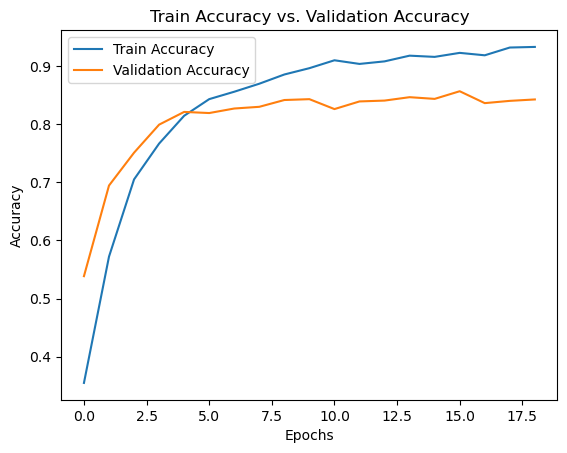

In [107]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs. Validation Accuracy')
plt.legend()
plt.show()

In [113]:
print("Training set Accuracy: {} %".format(history.history['accuracy'][-1]*100))

Training set Accuracy: 93.2567834854126 %


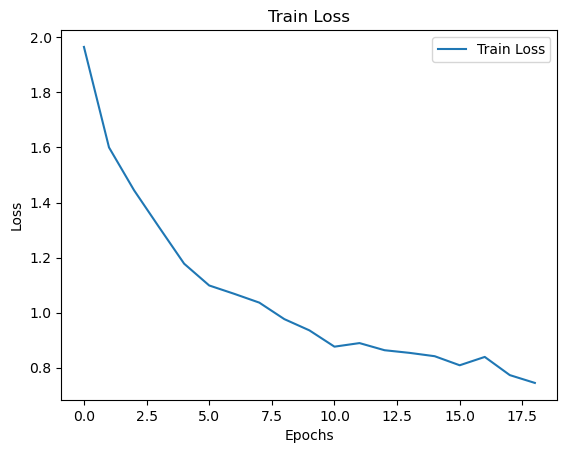

In [121]:
# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.legend()
plt.show()

In [101]:
# var = 0
# testing_image = X_test[var]
# testing_image.shape

In [3]:
# testing_image = np.expand_dims(testing_image, axis=0)
# testing_image.shape

In [5]:
# class_test[var]

In [7]:
# predictions = model.predict(testing_image)

In [9]:
# predictions

In [11]:
# predicted_class = np.argmax(predictions, axis=1)
# predicted_class

In [13]:
# predicted_label = label_encoder.inverse_transform(predicted_class)
# predicted_label

In [15]:
# from tensorflow.keras.models import load_model

In [17]:
# # Load the model from the saved file
# loaded_model = load_model(root+'mineral_model.h5')

# # Make predictions with the loaded model
# predictions = loaded_model.predict(testing_image)

# # Further steps for post-processing the predictions (e.g., decoding with LabelEncoder)
# predicted_class = np.argmax(predictions, axis=1)
# predicted_class

In [19]:
# predicted_label = label_encoder.inverse_transform(predicted_class)
# predicted_label